In [ ]:
import xarray as xr

lai_obs = xr.open_dataset("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/transfer_learning_from_1982/DATA/lai/AVH15C1/lai.nc")
lai_ensmean = xr.open_dataset("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/preds_for_analysis/ensmean/S3/ENSMEAN_S3_lai.nc")
lai_stable = xr.open_dataset("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/transfer_learning_from_1982/MODELS/Stable-Emulator/lai.nc")
lai_tl = xr.open_dataset("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/transfer_learning_from_1982/MODELS/TL-Emulator/lai.nc")

FileNotFoundError: [Errno 2] No such file or directory: '/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/pipeline/3.benchmark/ilamb/benchmarks/transfer_learning_from_1982/MODELS/Ensemble-Mean/ENSMEAN_S3_lai.nc'

In [ ]:
print(lai_tl)
print(lai_stable)
print(lai_ensmean)
print(lai_obs)

<xarray.Dataset> Size: 460MB
Dimensions:  (time: 444, lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 3kB 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
  * time     (time) object 4kB 1982-01-01 00:00:00 ... 2018-12-01 00:00:00
Data variables:
    lai      (time, lat, lon) float32 460MB ...
<xarray.Dataset> Size: 2GB
Dimensions:  (time: 1476, lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 3kB 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
  * time     (time) object 12kB 1901-01-01 00:00:00 ... 2023-12-01 00:00:00
Data variables:
    lai      (time, lat, lon) float32 2GB ...
<xarray.Dataset> Size: 3GB
Dimensions:  (time: 1476, lat: 360, lon: 720)
Coordinates:
  * time     (time) object 12kB 1901-01-01 00:00:00 ... 2023-12-01 00:00:00
  * lon      (lon) float64 6kB 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 3

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

def spatial_mean(da, area_weighted=True):
    """
    Spatial mean over lat/lon.
    If area_weighted=True, uses cos(lat) weights.
    """
    if area_weighted:
        weights = np.cos(np.deg2rad(da['lat']))
        da_mean = da.weighted(weights).mean(dim=('lat', 'lon'))
    else:
        da_mean = da.mean(dim=('lat', 'lon'))
    return da_mean

In [ ]:
means = {}

for ds in [lai_tl, lai_stable, lai_ensmean, lai_obs]:
    ds = ds.sel(time=slice("1982-01-01", "2018-12-31"))
    mean = spatial_mean(ds['lai'], area_weighted=True)

tl_trim = lai_tl.sel(time=slice("1982-01-01", "2018-12-31"))
stable_trim = lai_stable.sel(time=slice("1982-01-01", "2018-12-31"))
ensmean_trim = lai_ensmean.sel(time=slice("1982-01-01", "2018-12-31"))
obs_trim = lai_obs.sel(time=slice("1982-01-01", "2018-12-31"))

tl_mean = spatial_mean(tl_trim['lai'], area_weighted=True)
stable_mean = spatial_mean(stable_trim['lai'], area_weighted=True)
ensmean_mean = spatial_mean(ensmean_trim['lai'], area_weighted=True)
obs_mean = spatial_mean(obs_trim['lai'], area_weighted=True)



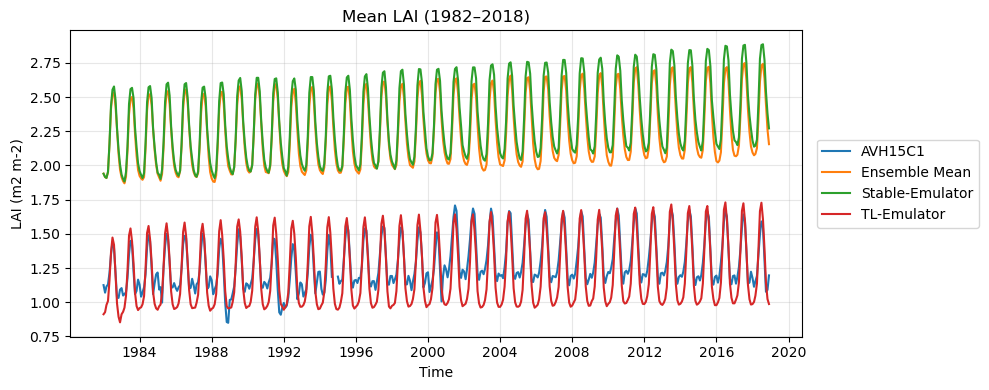

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

synthetic_time = pd.date_range(start="1982-01-01", end="2018-12-01", freq="MS")

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(synthetic_time, obs_mean,     label="AVH15C1")
ax.plot(synthetic_time, ensmean_mean, label="Ensemble Mean")
ax.plot(synthetic_time, stable_mean,  label="Stable-Emulator")
ax.plot(synthetic_time, tl_mean,      label="TL-Emulator")

ax.set_xlabel("Time")
ax.set_ylabel("LAI (m2 m-2)")
ax.set_title("Mean LAI (1982–2018)")
ax.grid(True, alpha=0.3)

# Legend outside on the right
ax.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
)

plt.tight_layout()
plt.show()

NameError: name 'obs_mean' is not defined

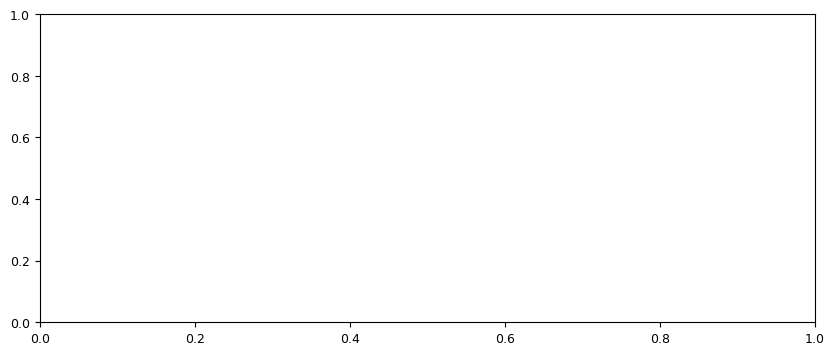

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# --- Global style tweaks (clean, readable) ---
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
})

# Okabe–Ito colour-blind-friendly palette
colors = {
    "obs":      "#0072B2",  # blue
    "ensmean":  "#D55E00",  # vermillion
    "stable":   "#009E73",  # bluish green
    "tl":       "#CC79A7",  # reddish purple
}

synthetic_time = pd.date_range(start="1982-01-01", end="2018-12-01", freq="MS")

fig, ax = plt.subplots(figsize=(10, 4))

# Slightly thicker lines, optional small markers for clarity
ax.plot(
    synthetic_time, obs_mean,
    label="AVH15C1",
    color=colors["obs"],
    linewidth=2.0,
)
ax.plot(
    synthetic_time, ensmean_mean,
    label="TRENDY Ensemble Mean",
    color=colors["ensmean"],
    linewidth=2.0,
    linestyle="--",
)
ax.plot(
    synthetic_time, stable_mean,
    label="Stable-Emulator",
    color=colors["stable"],
    linewidth=2.0,
)
ax.plot(
    synthetic_time, tl_mean,
    label="TL-Emulator",
    color=colors["tl"],
    linewidth=2.0,
    linestyle="--",
)

# Axes labels and title
ax.set_xlabel("Year")
ax.set_ylabel("LAI (m² m⁻²)")
ax.set_title("Global Mean LAI (1982–2018)")

# Time axis formatting
ax.xaxis.set_major_locator(mdates.YearLocator(4))   # tick every 4 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.YearLocator())    # minor ticks every year

# Grid + cleaner frame
ax.grid(True, which="major", alpha=0.3)
ax.grid(True, which="minor", alpha=0.15, linestyle=":")
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

ax.tick_params(axis="both", direction="out", length=4)

# Legend outside on the right
leg = ax.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
    frameon=False,
)

fig.tight_layout()
plt.show()

In [ ]:


# --- Helper: (optionally area-weighted) spatial mean --- #
def spatial_mean(da, area_weighted=True):
    """
    Spatial mean over lat/lon.
    If area_weighted=True, uses cos(lat) weights.
    """
    if area_weighted:
        weights = np.cos(np.deg2rad(da['lat']))
        da_mean = da.weighted(weights).mean(dim=('lat', 'lon'))
    else:
        da_mean = da.mean(dim=('lat', 'lon'))
    return da_mean

# --- Helper: collapse to one value per (year, month) in 1982–2018 --- #
def to_monthly_index_1982_2018(da_1d):
    """
    Take a 1D time series DataArray with a 'time' coord and:
      - restrict to years 1982–2018,
      - create an integer 'ym' = year*100 + month index,
      - group by ym and average (in case of duplicates),
      - return a series indexed by 'ym'.
    """
    years = da_1d["time"].dt.year
    months = da_1d["time"].dt.month

    mask = (years >= 1982) & (years <= 2018)
    da_sel = da_1d.where(mask, drop=True)

    years = da_sel["time"].dt.year
    months = da_sel["time"].dt.month
    ym = years * 100 + months
    
    da_sel = da_sel.assign_coords(ym=("time", ym))
    # One value per ym
    da_monthly = da_sel.groupby("ym").mean("time")
    return da_monthly

# --- Decode time on all datasets --- #
lai_obs     = xr.decode_cf(lai_obs)
lai_ensmean = xr.decode_cf(lai_ensmean)
lai_stable  = xr.decode_cf(lai_stable)
lai_tl      = xr.decode_cf(lai_tl)

print("Original time lengths:",
      lai_obs.dims.get("time"),
      lai_ensmean.dims.get("time"),
      lai_stable.dims.get("time"),
      lai_tl.dims.get("time"))

# --- Spatial means (global/domain) --- #
obs_ts_raw     = spatial_mean(lai_obs["lai"])
ensmean_ts_raw = spatial_mean(lai_ensmean["lai"])
stable_ts_raw  = spatial_mean(lai_stable["lai"])
tl_ts_raw      = spatial_mean(lai_tl["lai"])

# --- Restrict to 1982–2018 and align on (year, month) --- #
obs_m     = to_monthly_index_1982_2018(obs_ts_raw)
ensmean_m = to_monthly_index_1982_2018(ensmean_ts_raw)
stable_m  = to_monthly_index_1982_2018(stable_ts_raw)
tl_m      = to_monthly_index_1982_2018(tl_ts_raw)

# Align by 'ym' dimension (shared)
obs_m, ensmean_m, stable_m, tl_m = xr.align(
    obs_m, ensmean_m, stable_m, tl_m, join="inner"
)

print("Aligned monthly index lengths:",
      obs_m.sizes.get("ym"),
      ensmean_m.sizes.get("ym"),
      stable_m.sizes.get("ym"),
      tl_m.sizes.get("ym"))

# --- Rebuild a datetime index for plotting (e.g. 15th of each month) --- #
ym_vals = obs_m["ym"].values  # e.g. 198201, 198202, ...
years  = (ym_vals // 100).astype(int)
months = (ym_vals % 100).astype(int)

time_plot = np.array(
    [np.datetime64(f"{y:04d}-{m:02d}-15") for y, m in zip(years, months)]
)

# --- 1) Full time series plot (1982–2018) --- #
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(time_plot, obs_m.values,     label="Observation (AVH15C1)")
ax.plot(time_plot, ensmean_m.values, label="Ensemble Mean (S3)")
ax.plot(time_plot, stable_m.values,  label="Stable Emulator")
ax.plot(time_plot, tl_m.values,      label="TL Emulator")

ax.set_xlabel("Time")
ax.set_ylabel("Spatial mean LAI")
ax.set_title("Global/domain mean LAI – 1982–2018")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- 2) Mean seasonal cycle (climatology over 1982–2018) --- #
month_idx = (ym_vals % 100).astype(int)  # 1..12 from ym

# Create DataArrays with 'month' coord for grouping
obs_m_da     = xr.DataArray(obs_m.values,     coords={"month": month_idx}, dims=("month",))
ensmean_m_da = xr.DataArray(ensmean_m.values, coords={"month": month_idx}, dims=("month",))
stable_m_da  = xr.DataArray(stable_m.values,  coords={"month": month_idx}, dims=("month",))
tl_m_da      = xr.DataArray(tl_m.values,      coords={"month": month_idx}, dims=("month",))

obs_season     = obs_m_da.groupby("month").mean()
ensmean_season = ensmean_m_da.groupby("month").mean()
stable_season  = stable_m_da.groupby("month").mean()
tl_season      = tl_m_da.groupby("month").mean()

months = np.arange(1, 13)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(months, obs_season,     marker="o", label="Observation (AVH15C1)")
ax.plot(months, ensmean_season, marker="o", label="Ensemble Mean (S3)")
ax.plot(months, stable_season,  marker="o", label="Stable Emulator")
ax.plot(months, tl_season,      marker="o", label="TL Emulator")

ax.set_xticks(months)
ax.set_xlabel("Month")
ax.set_ylabel("Spatial mean LAI")
ax.set_title("Mean seasonal cycle of LAI (1982–2018 climatology)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2295500/3760304984.py:49: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  lai_obs.dims.get("time"),
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
/tmp/ipykernel_2295500/3760304984.py:50: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  lai_ensmean.dims.get("time"),
/tmp/ipykernel_2295500/3760304984.py:51: FutureWarning: The return type of `Dataset.dims`

Original time lengths: 468 1476 1476 444


TypeError: Variable 'ym': Using a DataArray object to construct a variable is ambiguous, please extract the data using the .data property.

In [ ]:
# --- 4) Mean seasonal cycle (climatology over all years) --- #
months = obs_ts["time"].dt.month

obs_season     = obs_ts.groupby(months).mean("time")
ensmean_season = ensmean_ts.groupby(months).mean("time")
stable_season  = stable_ts.groupby(months).mean("time")
tl_season      = tl_ts.groupby(months).mean("time")

month_vals = np.arange(1, 13)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(month_vals, obs_season,     marker="o", label="Observation (AVH15C1)")
ax.plot(month_vals, ensmean_season, marker="o", label="Ensemble Mean (S3)")
ax.plot(month_vals, stable_season,  marker="o", label="Stable Emulator")
ax.plot(month_vals, tl_season,      marker="o", label="TL Emulator")

ax.set_xticks(month_vals)
ax.set_xlabel("Month")
ax.set_ylabel("Spatial mean LAI")
ax.set_title("Mean seasonal cycle of LAI (1982–2018 climatology)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'obs_ts' is not defined